In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import json
from scipy.stats import sem
import math


In [38]:
# Load predicted temperature changes saved from climate data API:

temperatures_df = pd.read_csv('../1_Input/DF_Interim/temperature_changes_world_bank_climate_api_NP.csv', encoding='utf-8')
temperatures_df_means = pd.read_csv('../1_Input/DF_Interim/mean_temperature_changes_world_bank_climate_api_NP.csv', encoding='utf-8')
temperatures_df_stderr = pd.read_csv('../1_Input/DF_Interim/stderr_temperature_changes_world_bank_climate_api_NP.csv', encoding='utf-8')

temperatures_df_means = temperatures_df_means.set_index('Years')
temperatures_df_stderr = temperatures_df_stderr.set_index('Years')

In [39]:
# Quick view of data / ensuring things are as expected:
print(temperatures_df.loc[0:4, ['Years'] + list(temperatures_df.columns)[0:4]])
print(temperatures_df.shape)
print(temperatures_df_means.iloc[0:4, 0:4])
print(temperatures_df_means.shape)
print(temperatures_df_stderr.iloc[0:4, 0:4])
print(temperatures_df_stderr.shape)


       Years  Afghanistan   Albania   Algeria  American Samoa (U.S.)
0  2020-2039     0.988564  1.039408  1.022495               0.729553
1  2020-2039     0.896385  1.057861  0.860171               0.732849
2  2020-2039     2.136041  1.411377  1.926978               0.896240
3  2020-2039     1.901974  1.121633  1.514303               0.845367
4  2020-2039     1.271146  1.292928  1.420835               0.907104
(112, 241)
           Afghanistan   Albania   Algeria  American Samoa (U.S.)
Years                                                            
2020-2039     1.482653  1.222877  1.359490               0.776657
2040-2059     2.223555  1.937871  2.060303               1.194559
2060-2079     3.168366  2.713478  2.932578               1.677473
2080-2099     4.074688  3.506674  3.810633               2.162735
(4, 240)
           Afghanistan   Albania   Algeria  American Samoa (U.S.)
Years                                                            
2020-2039     0.060522  0.057254  0.05

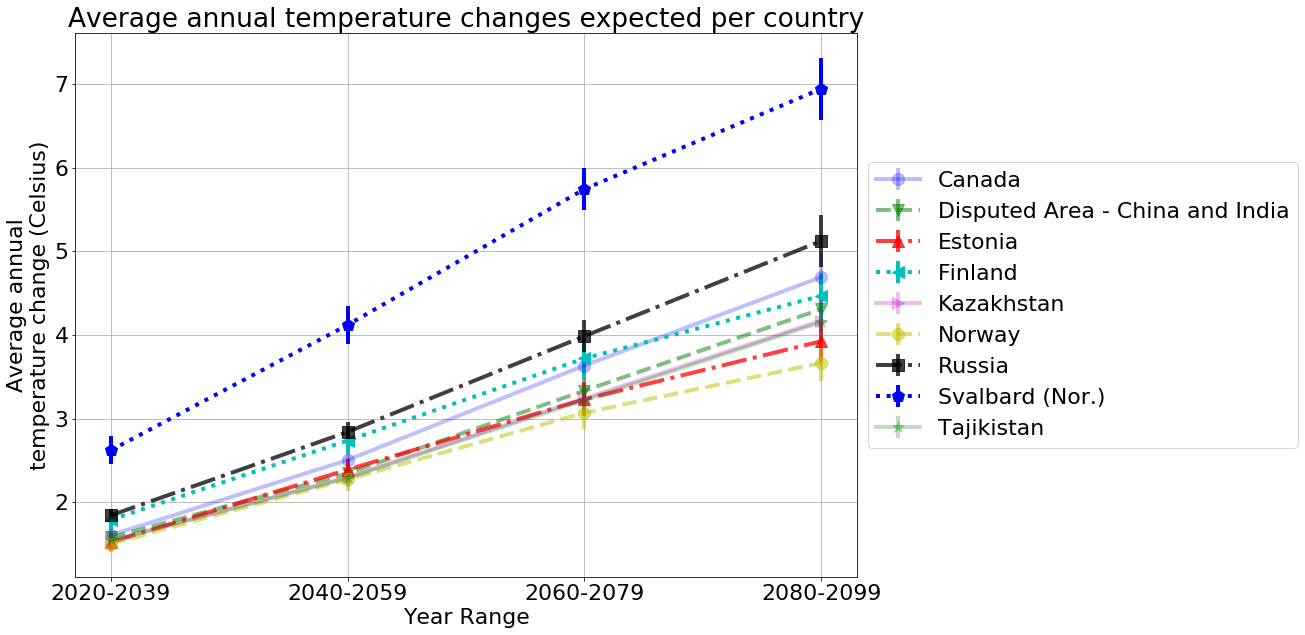

In [44]:
# Plot temperature changes per country - focus on the ones that are most affected by climate change

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
filled_markers = filled_markers * math.ceil(len(temperatures_df_means.columns) / len(filled_markers))
linestyles = ['solid', 'dashed', 'dashdot', 'dotted'] * math.ceil(len(temperatures_df_means.columns) / 4)
fillstyles = ['full', 'left', 'right', 'bottom','top', 'none'] * math.ceil(len(temperatures_df_means.columns) / 6)
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * math.ceil(len(temperatures_df_means.columns) / 7) # exclude white of course
alphas = [0.25,0.5,0.75,1] * math.ceil(len(temperatures_df_means.columns) / 4)

art_counter = -1
for i in np.arange(len(temperatures_df_means.columns)):
    if temperatures_df_means.iloc[0,i] >= 1.5:   # Too many countries to plot... 
                                                 # let's just focus on countries 
                                                 # where the expected temp increase 
                                                 # is at least 1.5 degrees Celsius
        art_counter += 1
        plt.errorbar(np.arange(len(temperatures_df_means.index)), temperatures_df_means.iloc[:,i], 
                     yerr=temperatures_df_stderr.iloc[:,i], label=temperatures_df_means.columns[i], 
                     marker=filled_markers[art_counter], linewidth=4, markersize=12, 
                     linestyle=linestyles[art_counter], color=colours[art_counter], alpha=alphas[art_counter])
plt.title('Average annual temperature changes expected per country')
plt.xlabel('Year Range')
plt.ylabel('Average annual\ntemperature change (Celsius)')
plt.xticks(np.arange(len(temperatures_df_means.index)),temperatures_df_means.index)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.gcf().set_size_inches(14, 10)
plt.rcParams.update({'font.size': 12})
plt.savefig("../6_Output/Average_annual_temp_change_prediction_per_country2_NP.png", bbox_inches='tight')
plt.show()

In [33]:
temperatures_df_means.head()

Afghanistan   Albania   Algeria  American Samoa (U.S.)   Andorra    Angola  \
0     1.482653  1.222877  1.359490               0.776657  1.102636  1.204251   
1     2.223555  1.937871  2.060303               1.194559  1.725589  1.819781   
2     3.168366  2.713478  2.932578               1.677473  2.453615  2.617097   
3     4.074688  3.506674  3.810633               2.162735  3.232128  3.428701   

   Anguilla (U.K.)  Antigua and Barbuda  Argentina   Armenia    ...     \
0         0.809911             0.807600   0.887148  1.334158    ...      
1         1.177605             1.172010   1.384778  2.078080    ...      
2         1.690256             1.679940   1.994190  2.934480    ...      
3         2.165686             2.156548   2.571198  3.789272    ...      

    Vanuatu  Venezuela   Vietnam  Wake Island (U.S.)  Wallis and Futuna (Fr.)  \
0  0.801480   1.194015  0.831056            0.929859                 0.781251   
1  1.185753   1.808401  1.363352            1.438042                 1.189145   
2  1.734487   2.583494  1.953981            1.988407                 1.690161   
3  2.231272   3.355680  2.602642            2.661616                 2.177709   

   West Bank and Gaza  Yemen, Republic of    Zambia  Zimbabwe   romania  
0            1.087415            1.185521  1.219919  1.240011  1.302438  
1            1.751669            1.818730  1.857582  1.896685  2.097147  
2            2.450350            2.592485  2.685154  2.761911  2.868973  
3            3.182792            3.397426  3.513218  3.597469  3.648821  

[4 rows x 240 columns]

In [46]:
# Load predicted precipitation changes per country saved from climate data API:

final_precipitations_means_df = pd.read_csv('../1_Input/DF_Interim/mean_precipitation_changes_NP.csv', encoding='utf-8')
final_precipitations_stderr_df = pd.read_csv('../1_Input/DF_Interim/stderr_precipitation_changes_NP.csv', encoding='utf-8')

final_precipitations_means_df = final_precipitations_means_df.set_index('Years')
final_precipitations_stderr_df = final_precipitations_stderr_df.set_index('Years')

In [47]:
# Quick view of data / ensuring things are as expected:

print(final_precipitations_means_df.iloc[0:4, 0:4])
print(final_precipitations_means_df.shape)
print(final_precipitations_stderr_df.iloc[0:4, 0:4])
print(final_precipitations_stderr_df.shape)


   index      Years  Afghanistan     Albania
0      0  2020-2039    -3.513526  -42.419139
1      1  2040-2059    -6.432855  -58.816210
2      2  2060-2079   -21.523026  -85.910413
3      3  2080-2099   -28.930377 -115.050994
(4, 242)
   index      Years  Afghanistan    Albania
0      0  2020-2039     5.214904   5.817850
1      1  2040-2059     5.001746   7.303921
2      2  2060-2079     6.746446   9.382676
3      3  2080-2099     7.279784  14.273374
(4, 242)


In [48]:
# Plot precipitation changes per country - focus on the ones that are most affected by climate change

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
filled_markers = filled_markers * math.ceil(len(final_precipitations_means_df.columns) / len(filled_markers))
linestyles = ['solid', 'dashed', 'dashdot', 'dotted'] * math.ceil(len(final_precipitations_means_df.columns) / 4)
fillstyles = ['full', 'left', 'right', 'bottom','top', 'none'] * math.ceil(len(final_precipitations_means_df.columns) / 6)
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * math.ceil(len(final_precipitations_means_df.columns) / 7) # exclude white of course
alphas = [0.25,0.5,0.75,1] * math.ceil(len(final_precipitations_means_df.columns) / 4)

art_counter = -1
for i in np.arange(len(final_precipitations_means_df.columns)):
    if (final_precipitations_means_df.iloc[0,i] <= -50) or (final_precipitations_means_df.iloc[0,i] >= 100):   
                                                             # Too many countries to plot... 
                                                             # let's just focus on countries 
                                                             # where the expected precipitation
                                                             # increase/decrease is at least +100/-50 mm 
        art_counter += 1
        plt.errorbar(np.arange(len(final_precipitations_means_df.index)), final_precipitations_means_df.iloc[:,i], 
                     yerr=final_precipitations_stderr_df.iloc[:,i], label=final_precipitations_means_df.columns[i], 
                     marker=filled_markers[art_counter], linewidth=4, markersize=12,
                     linestyle=linestyles[art_counter], color=colours[art_counter], alpha=alphas[art_counter])
plt.title('Average annual precipitation changes expected per country')
plt.xlabel('Year Range')
plt.ylabel('Average annual\nprecipitation change (mm)')
plt.xticks(np.arange(len(final_precipitations_means_df.index)),final_precipitations_means_df.index)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.gcf().set_size_inches(14, 10)
plt.rcParams.update({'font.size': 22})
plt.savefig("../6_Output/Average_annual_precipitation_change_prediction_per_country2_NP.png", bbox_inches='tight')
plt.show()

TypeError: '<=' not supported between instances of 'str' and 'int'